# Keras model example on mnist dataset of 28x28 res
## by Chandan Shinde [Github](https://github.com/chandan-shinde)
> Note : Make sure that you have mnist.csv and mnist_test.csv files in same directory of this notebook

In [1]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading the train and test data
with open('mnist.csv','r') as f:
    train = f.read()
    train = train.split('\n')
with open('mnist_test.csv','r') as f:
    test = f.read()
    test = test.split('\n')

x_train = []
y_train = []
x_test = []
y_test = []

for line in train:
    if line != '':
        x_train.append(np.array(line.split(',')[1:], dtype=np.float32))
        y_train.append(np.array(line.split(',')[0]))

for line in test:
    if line != '':
        x_test.append(np.array(line.split(',')[1:], dtype=np.float32))
        y_test.append(np.array(line.split(',')[0]))

    
x_train = np.array(x_train)/255 #normalizing
y_train = np.array(y_train)
x_test = np.array(x_test)/255 #normalizing
y_test = np.array(y_test)

del train, test

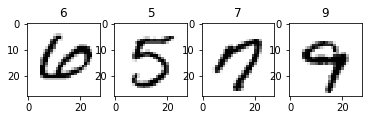

In [3]:
#showing some samples

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap = 'binary')
    plt.title(y_train[i])

In [4]:
#no of samples

print(f"no of training samples : {len(y_train)}")
print(f"no of testing samples : {len(y_test)}")


no of training samples : 20000
no of testing samples : 10000


In [5]:
#one hot encoding of labels
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False, categories='auto')

y_train = enc.fit_transform(y_train.reshape(len(y_train),1))
y_test = enc.fit_transform(y_test.reshape(len(y_test),1))

In [6]:
#building the model

model = Sequential()
model.add(Dense(512,name='layer1',input_dim=784, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,name='layer2', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512,name='layer3', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,name='output', activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
layer2 (Dense)               (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
layer3 (Dense)               (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
output (Dense)               (None, 10)                5130      
Total para

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])

In [8]:
#running training for 120 epoches on batch size 1024 (5 + 110 + 5)
    
model.fit(x_train, y_train, batch_size=1024, validation_split=0.2, epochs=5, verbose=1)
model.fit(x_train, y_train, batch_size=1024, validation_split=0.2, epochs=110, verbose=0)
model.fit(x_train, y_train, batch_size=1024, validation_split=0.2, epochs=5, verbose=1)

Train on 16000 samples, validate on 4000 samples
Epoch 1/5
16000/16000 [==============================] - 2s 98us/step - loss: 2.2827 - acc: 0.1434 - val_loss: 2.2472 - val_acc: 0.1900
Epoch 2/5
16000/16000 [==============================] - 1s 76us/step - loss: 2.2281 - acc: 0.2002 - val_loss: 2.1885 - val_acc: 0.2745
Epoch 3/5
16000/16000 [==============================] - 1s 75us/step - loss: 2.1758 - acc: 0.2629 - val_loss: 2.1275 - val_acc: 0.3775
Epoch 4/5
16000/16000 [==============================] - 1s 76us/step - loss: 2.1176 - acc: 0.3392 - val_loss: 2.0616 - val_acc: 0.4937
Epoch 5/5
16000/16000 [==============================] - 1s 74us/step - loss: 2.0559 - acc: 0.4159 - val_loss: 1.9893 - val_acc: 0.5962
Train on 16000 samples, validate on 4000 samples
Epoch 1/5
16000/16000 [==============================] - 1s 73us/step - loss: 0.3179 - acc: 0.9084 - val_loss: 0.2918 - val_acc: 0.9160
Epoch 2/5
16000/16000 [==============================] - 1s 73us/step - loss: 0.3193 -

In [9]:
#evaluating the model on test set
score = model.evaluate(x_test,y_test)
print(f"loss : {score[0]}")
print(f"accuracy : {score[1] * 100} %")

10000/10000 [==============================] - 1s 66us/step
loss : 0.2708023969233036
accuracy : 92.14 %


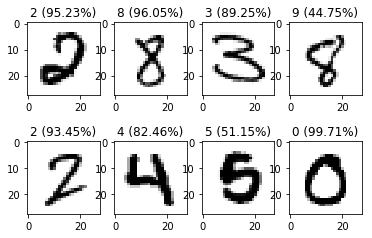

In [10]:
#testing the predictions on test set
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_test[i+400].reshape(28,28), cmap = 'binary')
    pred = model.predict(x_test[i+400].reshape(1,784))
    val = np.argmax(pred)
    per = pred[0,val] * 100
    label = str(val) + " (" + str(round(per, 2)) + "%)"
    plt.title(label)
   


In [11]:
model.save('mnist_trained.h5')